In [ ]:
"""
Decision trees are versatile machine learning algorithms that can perform both classification and regression tasks
multioutput tasks

They are powerful algorithms capability of fitting complexy datasets

Decision trees are fundamental components of Random Forests algorithms which are among th emost powerful Machine
Learning algorithms available today.

One of the many qualities of Decision Trees is that they require very little data preparation, do not require 
feature scaling or centering at all.
"""


In [56]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [33]:
iris = load_iris()
X = iris.data[:,2:] # petal length and width
y = iris.target

In [34]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file=image_path('iris_tree.dot'), feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
#export_graphviz(tree_clf, out_file='iris_tree.dot', feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)

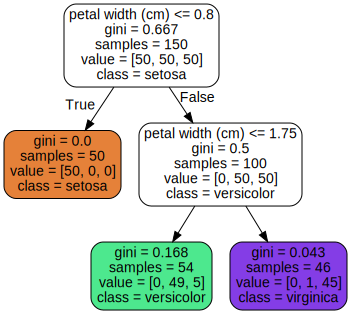

In [31]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

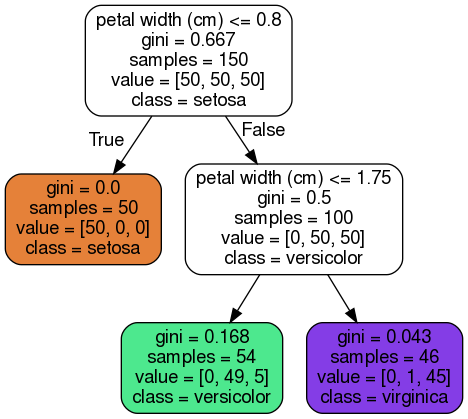

In [26]:
# os.getcwd() - returns the current working directory
# os.chdir() - change directory

# generate the image with 
# dot -Tpng ./images/decision_trees/iris_tree.dot -o ./images/decision_tree/iris_tree.png

# View the image
from IPython.display import Image
Image(filename='images/decision_trees/iris_tree.png') 


In [ ]:
"""
Gini index of a node i, G(i) = 1 - (pi,1)^2 - (pi,2)^2 - (pi,3)^2 ...
where pi,k is the ratio of class k instances among the training instances in the ith node
"""

Saving figure decision_tree_decision_boundaries_plot


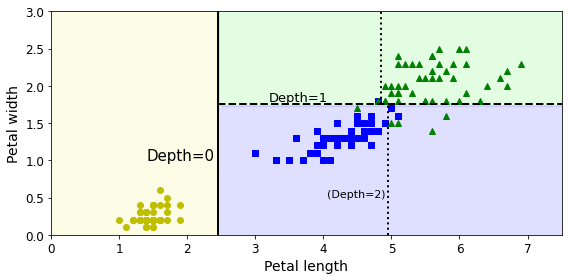

In [35]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Estimating Class Probabilities

In [ ]:
"""
A decision tree can estimate the probability that an instance belongs to a particular class k.
First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training
instances of class in in this node. 
A k-element vector is return where each element corresponds to the ratio of number of instances of that class 
to the total number of instances

For example, assume with have a flower whose petals are 5cm long and 1.5cm wide"""

In [36]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [44]:
tree_clf.predict([[5,1.5]])

array([1])

In [45]:
tree_clf.predict([[2,1.5]])

array([0])

In [46]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## High Variance

We have seen that small changes in the dataset (such as a rotation) may produce a very different Decision Tree. Now let's show that training the smae model on the same data may produce a very different model every time since the CART
training algorithm used by Scikit-Learn is stochastic. To show this, we will set random_state to a different value
than earlier

In [48]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


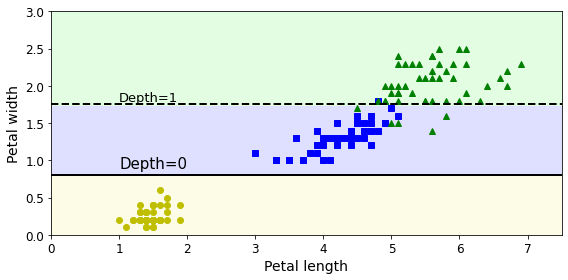

In [49]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

Saving figure min_samples_leaf_plot


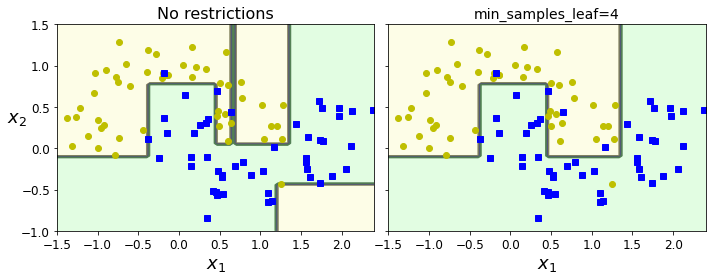

In [53]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
#plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.title(f"min_samples_leaf={deep_tree_clf2.min_samples_leaf}", fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

### Rotating the data

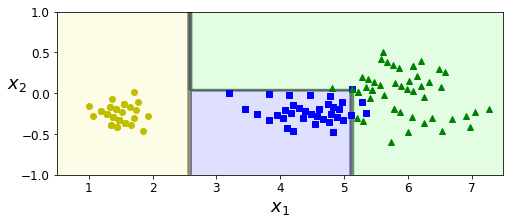

In [54]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

Saving figure sensitivity_to_rotation_plot


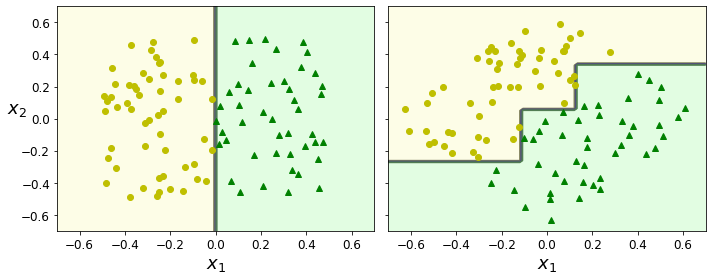

In [55]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

# Regularization Hyperparameters

* nonparametric models are models that do not require specifying the values of required parameters prior to training
* parametric models, e.g., linear model, has predetermined number of parameters, so it's degree of freedom is limited and reduces the risk of overfitting (but increasing the risk of underfitting)

* To avoid overfitting the training the data, one needs to restrict the Decision Tree's freedom during training
* This process of restricting the freedom is called regularization
* The regularization of hyperparameters depends on the algorithm used but the maximum depth of the Decision Tree can be restricted
* In Scikit-Learn, the maximum depth of the Decision Tree is controlled by max_depth hyperparameter (default is None)
* Reducing max_depth will regularize the model and thus reduce the risk of overfitting. 

## Regularization parameters of the decision tree

Other regularization parameters of the Scikit-Learn DecisionTreeClassifier include
* min_samples_split - the minimum number of samples a node must have before it can be split
* min_samples_leaf  - the minimum number of samples a leaf node must have
* min_weight_fraction_leaft - same as min_sample_leaf but expressed as a fraction of the total number of weighted instances
* max_leaf_nodes - the maximum number of leaf nodes
* max_features - the maximum number of features that are evaluated for splitting at each node
presort=True - used for sorting the training data can be useful for small datasets

Increasing the min_* hyperparameters or reducing the max_* hyperparameters will regularize the model

# Computation Complexity

* Making predictions requires traversing the the Decision Tree from a root to a leaf

* Decision Trees are approximately balanced, so traversing the DT requires going through roughly O(log2(m)) nodes

* Since each node requires checking the value of one feature, the overall prediction complexity is O(log2(m)), independent of the number of feature. So predictions are very fast when dealing with large training set

* if max_features is set, the traninig algorithm compares all features (or less) on all samples at each node.

* Comparing all features of all samples at each node results in a training complexity of O(n x m log2(m)), n = number of training samples, m = number of nodes